# Lung and Colon cancer detection

# Importing libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense 

# Preprocessing

Loading data set

In [6]:
file_paths_lung = []
labels_lung = []

file_paths_colon = []
labels_colon = []

lung_file_path = 'input_files/lung_colon_image_set/lung_image_sets'
colon_file_path = 'input_files/lung_colon_image_set/colon_image_sets'

lung_types = os.listdir(lung_file_path)
colon_types = os.listdir(colon_file_path)

for lung_type in lung_types:
    folder_path = os.path.join(lung_file_path, lung_type)
    list_of_files = os.listdir(folder_path)
    for file in list_of_files:
        file_path = os.path.join(folder_path, file)
        
        file_paths_lung.append(file_path)
        labels_lung.append(lung_type)

for colon_type in colon_types:
    folder_path = os.path.join(colon_file_path, colon_type)
    list_of_files = os.listdir(folder_path)
    for file in list_of_files:
        file_path = os.path.join(folder_path, file)
        
        file_paths_colon.append(file_path)
        labels_colon.append(colon_type)
        

lung_data_frame = pd.concat([pd.Series(file_paths_lung, name="paths"), pd.Series(labels_lung, name="labels")], axis=1)
colon_data_frame = pd.concat([pd.Series(file_paths_colon, name="paths"), pd.Series(labels_colon, name="labels")], axis=1)

print(lung_data_frame)


                                                   paths    labels
0      input_files/lung_colon_image_set/lung_image_se...  lung_aca
1      input_files/lung_colon_image_set/lung_image_se...  lung_aca
2      input_files/lung_colon_image_set/lung_image_se...  lung_aca
3      input_files/lung_colon_image_set/lung_image_se...  lung_aca
4      input_files/lung_colon_image_set/lung_image_se...  lung_aca
...                                                  ...       ...
14995  input_files/lung_colon_image_set/lung_image_se...  lung_scc
14996  input_files/lung_colon_image_set/lung_image_se...  lung_scc
14997  input_files/lung_colon_image_set/lung_image_se...  lung_scc
14998  input_files/lung_colon_image_set/lung_image_se...  lung_scc
14999  input_files/lung_colon_image_set/lung_image_se...  lung_scc

[15000 rows x 2 columns]


 Is data set balanced?

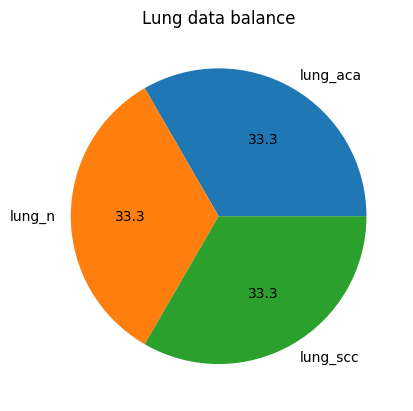

In [9]:
plt.pie(lung_data_frame.labels.value_counts(), labels = lung_data_frame.labels.value_counts().index, autopct='%1.1f')
plt.title("Lung data balance")
plt.show()

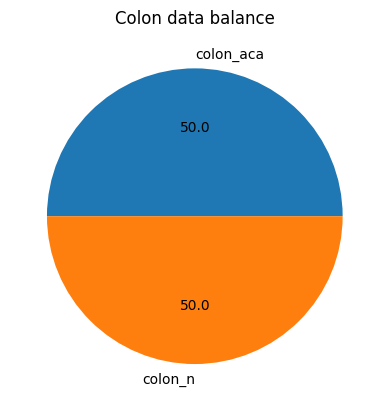

In [10]:
plt.pie(colon_data_frame.labels.value_counts(), labels = colon_data_frame.labels.value_counts().index, autopct='%1.1f')
plt.title("Colon data balance")
plt.show()

Splitting data in 3 groups: train, test and valid

In [12]:
train_df_lung, rest_lung = train_test_split(lung_data_frame, train_size=0.7, shuffle=True, random_state=123)
valid_df_lung, test_df_lung = train_test_split(rest_lung, train_size=0.5, shuffle=True, random_state=123)

In [13]:
train_df_colon, rest_colon = train_test_split(colon_data_frame, train_size=0.7, shuffle=True, random_state=123)
valid_df_colon, test_df_colon = train_test_split(rest_colon, train_size=0.5, shuffle=True, random_state=123)

Image data generator

In [20]:
batch_size = 16
img_size = (224, 224)

tr_gen_lung = ImageDataGenerator(rescale=1./255)
ts_gen_lung = ImageDataGenerator(rescale=1./255)
val_gen_lung = ImageDataGenerator(rescale=1./255)

train_gen_lung = tr_gen_lung.flow_from_dataframe(
    train_df_lung,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

valid_gen_lung = val_gen_lung.flow_from_dataframe(
    valid_df_lung,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

test_gen_lung = ts_gen_lung.flow_from_dataframe(
    test_df_lung,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size)

Found 10500 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.


In [21]:
tr_gen_colon = ImageDataGenerator(rescale=1./255)
ts_gen_colon = ImageDataGenerator(rescale=1./255)
val_gen_colon = ImageDataGenerator(rescale=1./255)

train_gen_colon = tr_gen_colon.flow_from_dataframe(
    train_df_colon,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

valid_gen_colon = val_gen_colon.flow_from_dataframe(
    valid_df_colon,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

test_gen_colon = ts_gen_colon.flow_from_dataframe(
    test_df_colon,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size)

Found 7000 validated image filenames belonging to 2 classes.
Found 1500 validated image filenames belonging to 2 classes.
Found 1500 validated image filenames belonging to 2 classes.


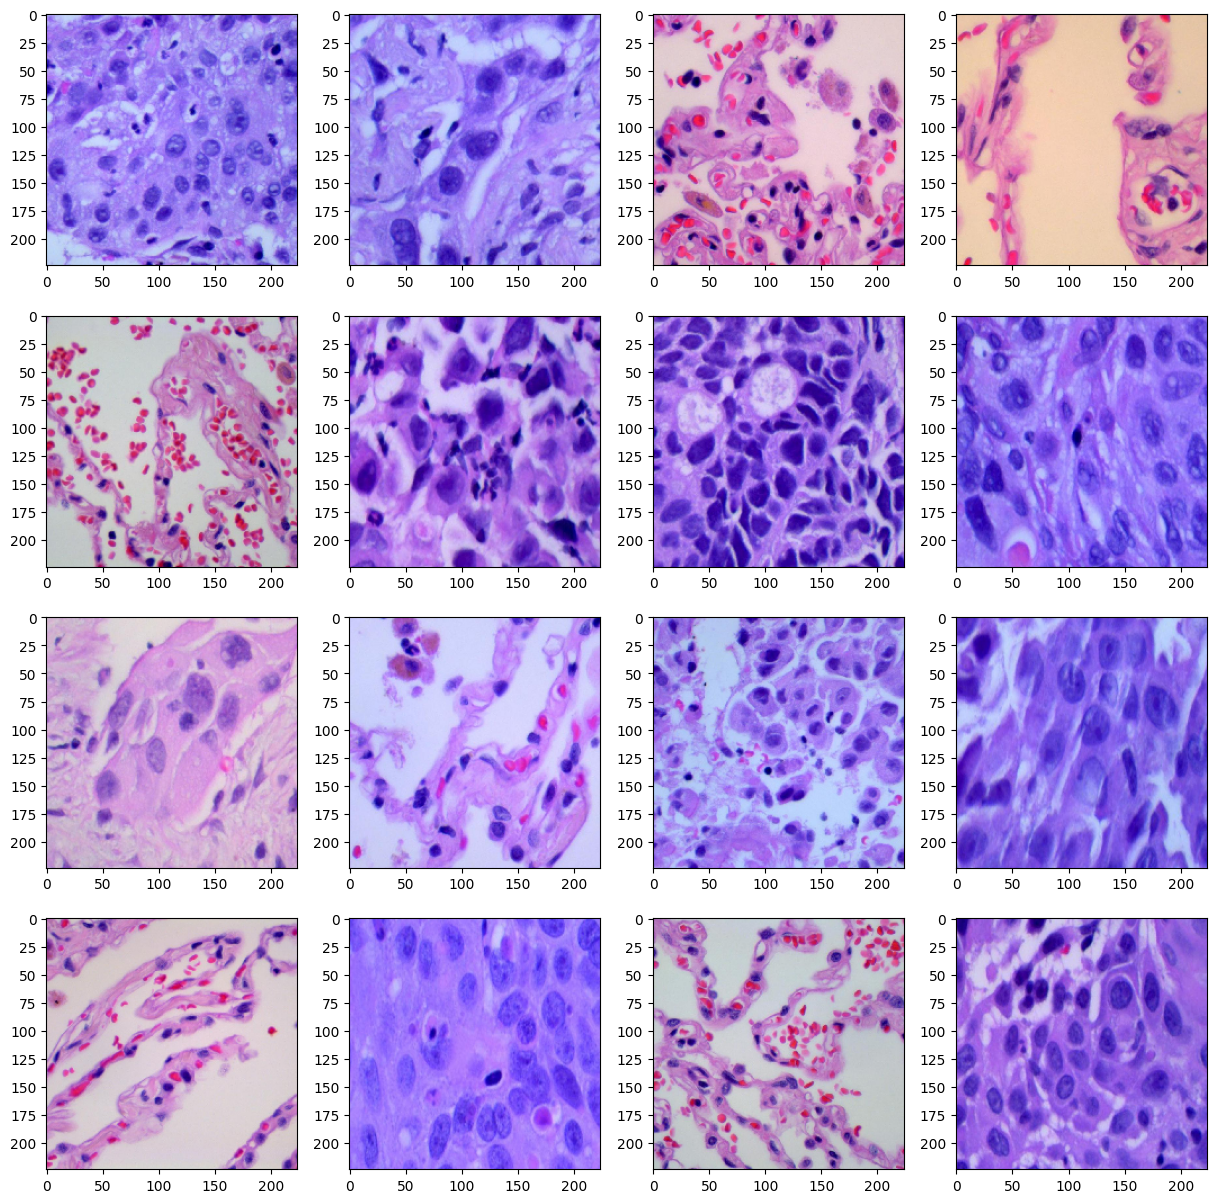

In [24]:
images, labels = next(train_gen_lung)

plt.figure(figsize= (15, 15))

for i in range(batch_size):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    
plt.show()

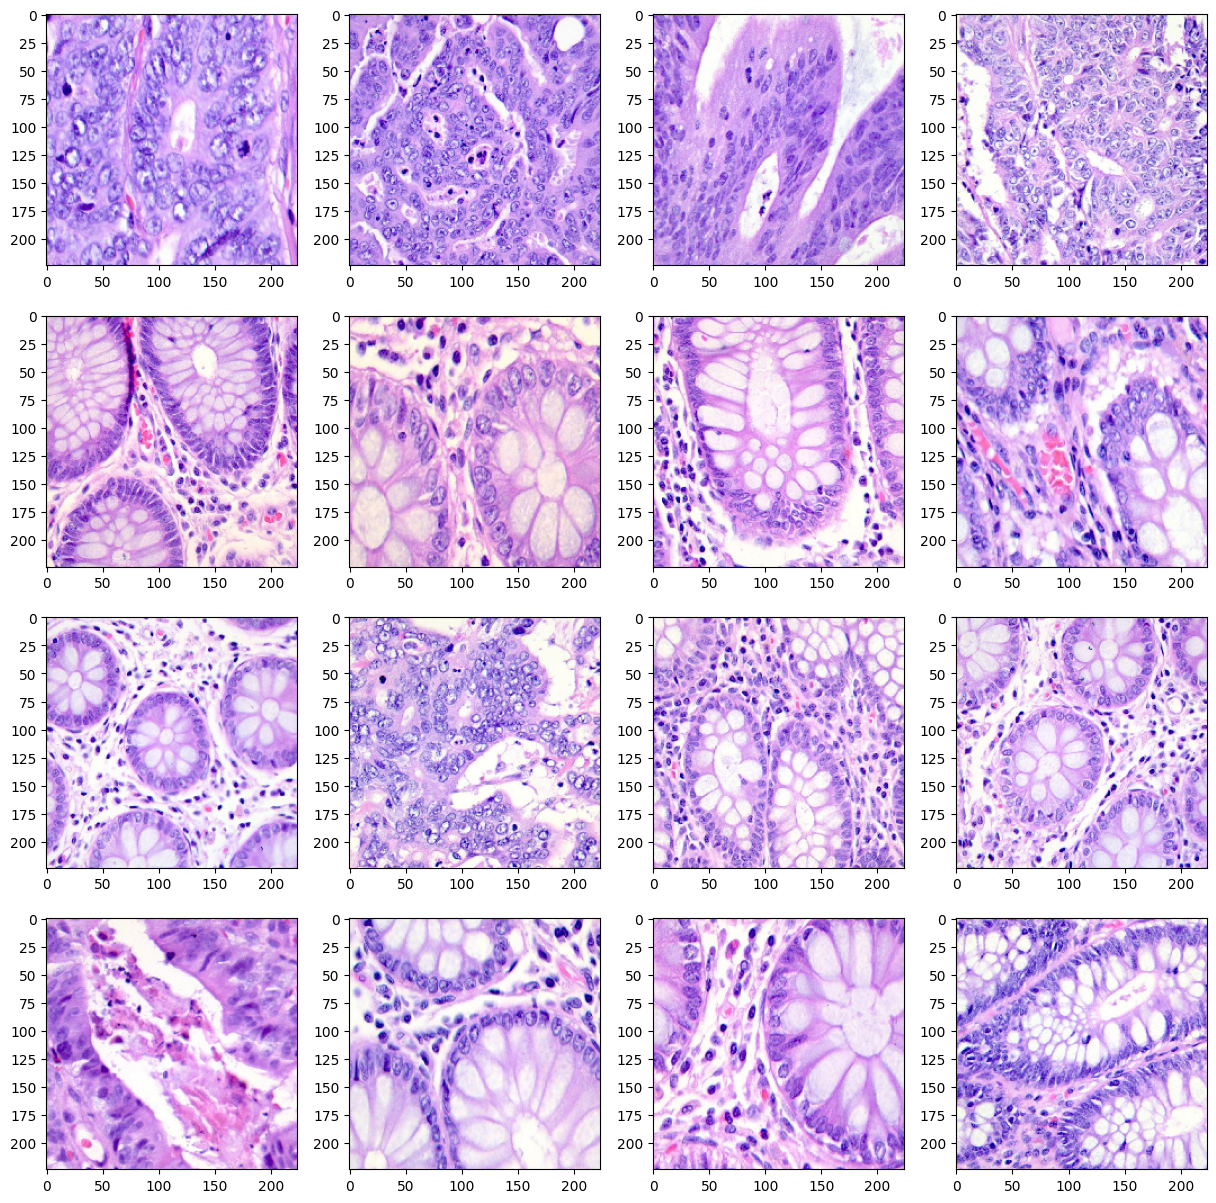

In [25]:
images, labels = next(train_gen_colon)

plt.figure(figsize= (15, 15))

for i in range(batch_size):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    
plt.show()

# Models